In [12]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())



Tue Jun 15 00:28:46 2021


In [13]:
### This box uploads all information and renames the columns based on the naming conventions used by the TimePix file creation system. 
### In new experiments there may be more or less columns, or they may be differently named. 
### It is important to check all errors and that the resulting DataFrame makes sense and has all expected information. 
filename = 'x_399.5_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

,y,x,time,center flux,cluster size
0,225,85,0,1850,6
1,214,182,9086720,1825,6
2,135,69,13212416,2025,6
3,90,67,29467904,1725,6
4,86,57,33462528,2525,9
...,...,...,...,...,...
1570337,89,33,16594431744512,1275,4
1570338,180,194,16594439576320,1450,6
1570339,95,51,16594472629504,1350,4
1570340,219,70,16594495357952,1525,5


In [14]:
new_filename = 'xscan_399s'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,225,85,0,1850,6
1,214,182,9086720,1825,6
2,135,69,13212416,2025,6
3,90,67,29467904,1725,6
4,86,57,33462528,2525,9
...,...,...,...,...,...
1570337,89,33,16594431744512,1275,4
1570338,180,194,16594439576320,1450,6
1570339,95,51,16594472629504,1350,4
1570340,219,70,16594495357952,1525,5


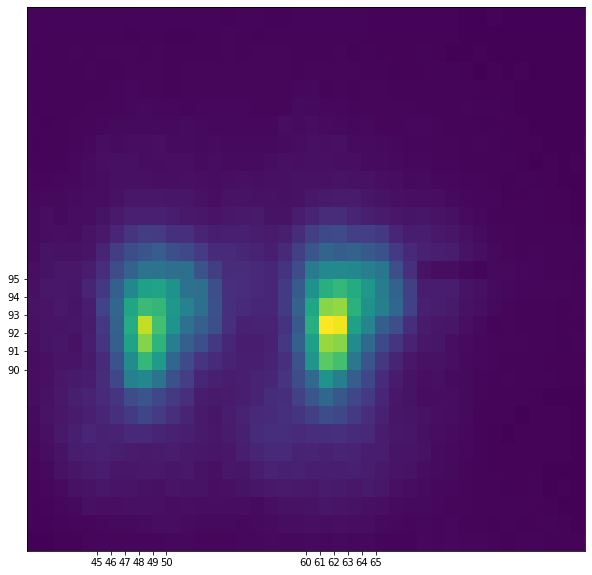

In [15]:
# This cell is used to see an image of the ions. Helpful to make sure ions did not move (blurry) and that there weren't spatial errors 
# Helpful also to identify the locaitons of the ions.
plt.figure(figsize=(10, 10))
filename = 'xscan_399s'
it = pd.read_csv(filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(80, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 48; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

In [16]:
it = pd.read_csv(filename)  
it = it.drop(columns = {'Unnamed: 0'})
it

,y,x,time,center flux,cluster size
0,225,85,0,1850,6
1,214,182,9086720,1825,6
2,135,69,13212416,2025,6
3,90,67,29467904,1725,6
4,86,57,33462528,2525,9
...,...,...,...,...,...
1570337,89,33,16594431744512,1275,4
1570338,180,194,16594439576320,1450,6
1570339,95,51,16594472629504,1350,4
1570340,219,70,16594495357952,1525,5


(0, 16594497912832)

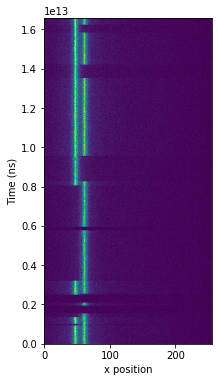

In [17]:
# Check the data over time to see if there are times in which the chain is broken or melted. 
# Find start and end of the broken crystal times and plug that into the start and end variables. 
fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

In [18]:
filename_2 = 'x_400.5_y_155'
it = pd.read_csv(f'{filename_2}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it


,y,x,time,center flux,cluster size
0,100,77,0,2150,6
1,88,48,4059904,550,3
2,32,145,18028800,1600,5
3,55,48,20925440,1625,5
4,125,77,23561984,1600,6
...,...,...,...,...,...
1175844,90,64,16595225810176,1825,7
1175845,202,7,16595231674624,1625,5
1175846,90,71,16595264919552,2425,6
1175847,137,149,16595277942528,3700,12


In [19]:
new_filename_2 = 'xscan_400s'
it.to_csv(new_filename_2)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,100,77,0,2150,6
1,88,48,4059904,550,3
2,32,145,18028800,1600,5
3,55,48,20925440,1625,5
4,125,77,23561984,1600,6
...,...,...,...,...,...
1175844,90,64,16595225810176,1825,7
1175845,202,7,16595231674624,1625,5
1175846,90,71,16595264919552,2425,6
1175847,137,149,16595277942528,3700,12


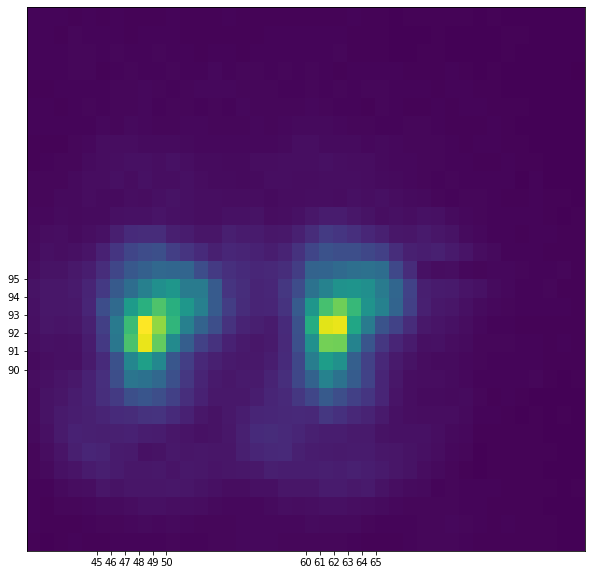

In [20]:
plt.figure(figsize=(10, 10))
filename_2 = 'xscan_400s'
it = pd.read_csv(filename_2)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(80, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 48; y1 = 92
x2 = 62; y2 = 92


In [21]:
it = pd.read_csv(filename_2)  
it = it.drop(columns = {'Unnamed: 0'})
it

,y,x,time,center flux,cluster size
0,100,77,0,2150,6
1,88,48,4059904,550,3
2,32,145,18028800,1600,5
3,55,48,20925440,1625,5
4,125,77,23561984,1600,6
...,...,...,...,...,...
1175844,90,64,16595225810176,1825,7
1175845,202,7,16595231674624,1625,5
1175846,90,71,16595264919552,2425,6
1175847,137,149,16595277942528,3700,12


(0, 16595282346496)

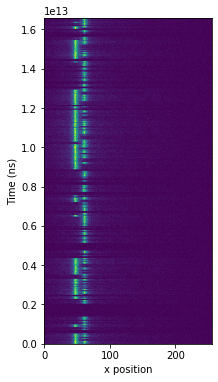

In [22]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

In [23]:
filename = 'x_401.5_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'xscan_401s'
it.to_csv(new_filename)  ##### changes actual file
it



,y,x,time,center flux,cluster size
0,78,44,0,1125,4
1,70,45,0,1700,5
2,193,136,2908416,1300,5
3,246,151,43821312,1825,6
4,238,69,88668160,1475,4
...,...,...,...,...,...
1340254,164,104,16594358489344,1575,4
1340255,95,52,16594373251840,1925,7
1340256,142,17,16594418424576,2125,10
1340257,39,33,16594439778048,3050,10


In [24]:
it = pd.read_csv("xscan_401s")  
it

,Unnamed: 0,y,x,time,center flux,cluster size
0,0,78,44,0,1125,4
1,1,70,45,0,1700,5
2,2,193,136,2908416,1300,5
3,3,246,151,43821312,1825,6
4,4,238,69,88668160,1475,4
...,...,...,...,...,...,...
1340254,1340254,164,104,16594358489344,1575,4
1340255,1340255,95,52,16594373251840,1925,7
1340256,1340256,142,17,16594418424576,2125,10
1340257,1340257,39,33,16594439778048,3050,10


In [25]:
it = it.drop(columns = {'Unnamed: 0'})
it

,y,x,time,center flux,cluster size
0,78,44,0,1125,4
1,70,45,0,1700,5
2,193,136,2908416,1300,5
3,246,151,43821312,1825,6
4,238,69,88668160,1475,4
...,...,...,...,...,...
1340254,164,104,16594358489344,1575,4
1340255,95,52,16594373251840,1925,7
1340256,142,17,16594418424576,2125,10
1340257,39,33,16594439778048,3050,10


Text(0, 0.5, 'Time (ns)')

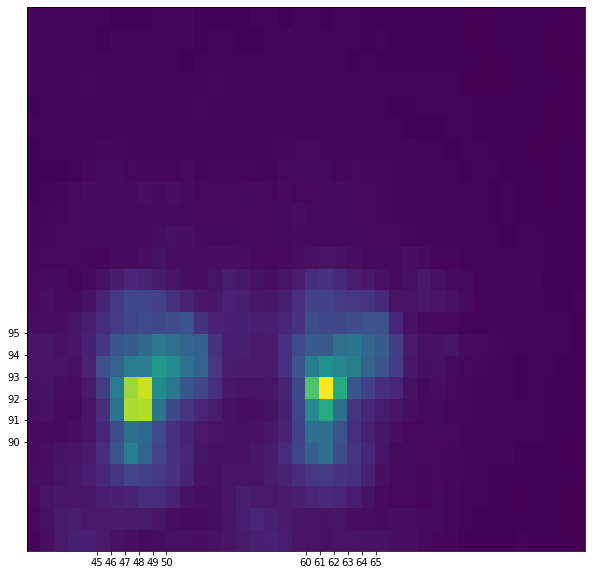

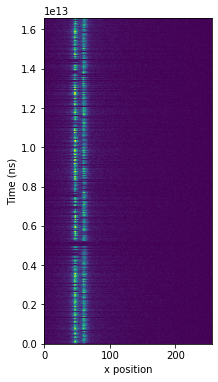

In [26]:
plt.figure(figsize=(10, 10))
filename = 'xscan_401s'
it = pd.read_csv(filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 48; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
#start = 0.51e13; end = 0.525e13; duration = end - start
#ax0.set_ylim(start, end)

In [27]:
filename = 'x_402.5_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'xscan_402s'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,88,53,0,675,4
1,96,55,2309632,1275,10
2,194,104,3739392,950,2
3,243,45,9370880,1775,10
4,86,52,31982080,2625,8
...,...,...,...,...,...
1210078,247,167,16594523267072,2525,6
1210079,188,21,16594542915328,1350,5
1210080,92,65,16594543186944,2000,6
1210081,114,30,16594549796864,2400,7


(0, 16594551078400)

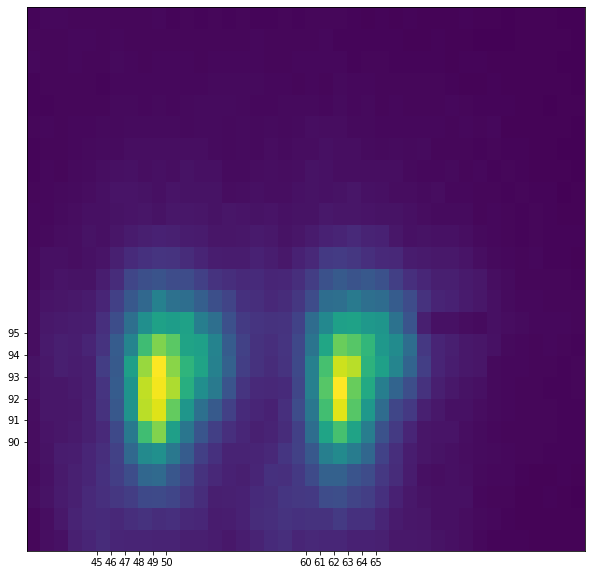

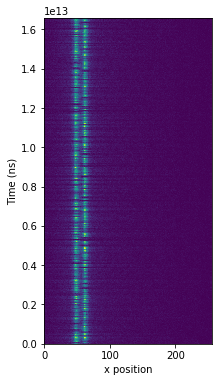

In [28]:
plt.figure(figsize=(10, 10))
filename = 'xscan_402s'
it = pd.read_csv(filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

In [29]:
filename = 'x_403.5_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'xscan_403s'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,90,61,0,800,2
1,119,87,2519808,2200,7
2,95,63,3730688,1425,4
3,187,214,19191808,2050,6
4,88,57,34816000,1375,5
...,...,...,...,...,...
1352247,2,81,16594456317184,1200,4
1352248,92,61,16594461568768,1225,6
1352249,91,47,16594461693184,2200,11
1352250,88,48,16594462969600,1875,7


(0, 16594475967744)

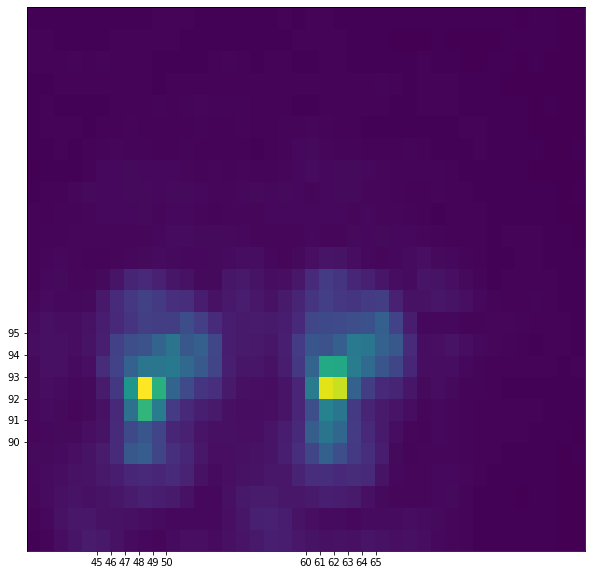

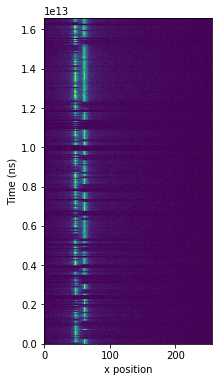

In [30]:
plt.figure(figsize=(10, 10))
#filename = 'xscan_402s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 92



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

In [31]:
filename = 'x_403_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'xscan_403'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,89,51,0,1275,4
1,184,85,18056960,2525,7
2,80,55,18386432,3550,9
3,73,43,18389760,2700,7
4,0,218,24043520,525,3
...,...,...,...,...,...
1213435,114,10,16594765809408,3675,10
1213436,87,66,16594785666560,1425,5
1213437,92,63,16594836802560,3200,9
1213438,186,177,16594838778112,3875,9


(0, 16594846452480)

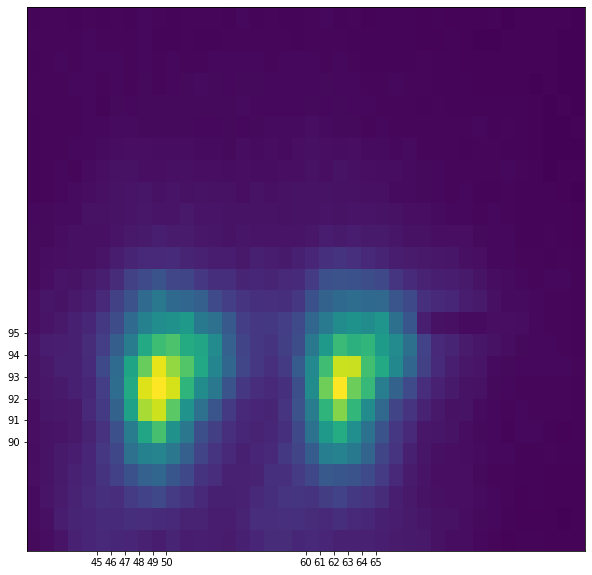

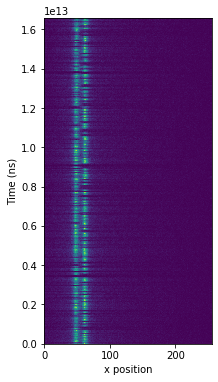

In [32]:
plt.figure(figsize=(10, 10))
#filename = 'xscan_402s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 93



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)

In [33]:
filename = 'x_404_y_155'
it = pd.read_csv(f'{filename}.csv')
#print(it)
it = it.drop(columns = 'Unnamed: 5')
it = it.rename(columns = {'#Col': 'y', '#Row': 'x', '#ToA': 'time', '#ToT[arb]': 'center flux', '#Centroid': 'cluster size'})
ToA = it['time']
it['time'] = it['time'] - ToA[0]
it = it.sort_values(['time'])
it

new_filename = 'xscan_404'
it.to_csv(new_filename)  ##### changes actual file
it

,y,x,time,center flux,cluster size
0,92,47,0,1300,6
1,168,34,11535360,2100,8
2,92,62,14508544,750,2
3,156,40,19072512,1250,4
4,89,59,23107328,2025,6
...,...,...,...,...,...
1214180,255,16,16594202982400,275,2
1214181,97,95,16594228055040,1225,4
1214182,111,143,16594230297344,2050,7
1214183,236,162,16594363536896,2725,7


(0, 16594372872704)

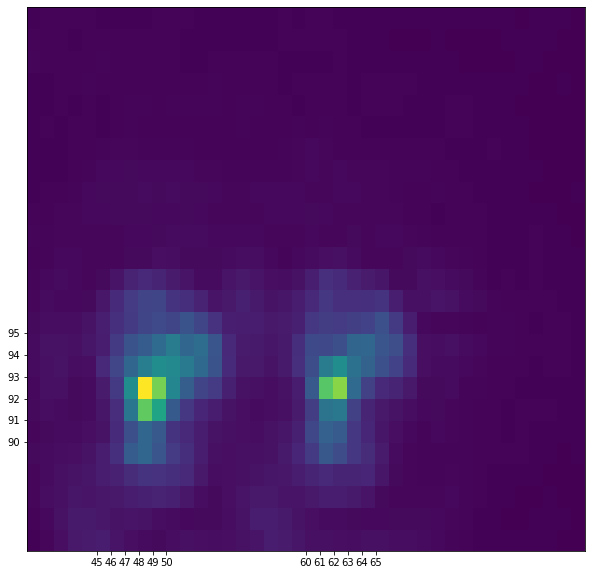

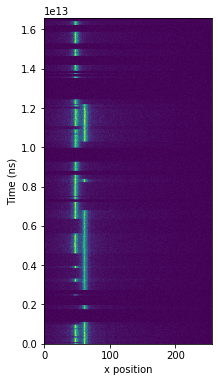

In [34]:
plt.figure(figsize=(10, 10))
#filename = 'xscan_402s'
it = pd.read_csv(new_filename)
plt.hist2d(it['x'], it['y'], bins = (256, 256), range = [(0, 256), (0, 256)])
#x_guess = 40
#y_guess = 85
plt.xlim(40,80)
plt.ylim(85, 110)
plt.xticks([45,46,47,48,49,50,60,61,62,63,64,65])
plt.yticks([90,91,92,93,94,95])
x1 = 49; y1 = 92
x2 = 62; y2 = 93



#plt.savefig('Ions.svg')

fig, (ax0) = plt.subplots(ncols=1, figsize=(3,6))
h = ax0.hist2d(it['x'], it['time'], bins = [256, 400])
#ax0.set_xlim(x1-5,x1+5)
ax0.set_xlabel('x position')
ax0.set_ylabel('Time (ns)')

#it['time'].max()
start = 0; end = it['time'].max(); duration = end - start
ax0.set_ylim(start, end)